In [24]:
# Install the latest Tensorflow version.
#!pip3 install --quiet "tensorflow>=1.7"
# Install TF-Hub.

!pip install tensorflow
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text



#!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn

In [26]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


In [33]:
#module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

In [35]:
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
    return model(input)


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [46]:
#word = "Elephant"
#sentence = "I am a sentence for which I would like to get its embedding."
#paragraph = (
    #"Universal Sentence Encoder embeddings also support short paragraphs. "
    #"There is no hard limit on how long the paragraph is. Roughly, the longer "
    #"the more 'diluted' the embedding will be.")
    
word = "Billing"
sentence = "I have few questions related to billing"
paragraph = (
    "Billing is not completely processed and throwing errors while going to billing section. "
    "Previous payment was not refunded and charged twice on one order."
    "Bill amount is showing wrong, discount is not being applied."
"Need help with the billing queries.")

messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Billing
Embedding size: 512
Embedding: [-0.05806294456124306, -0.0012028254568576813, 0.0603945329785347, ...]

Embedding: [-0.05806294456124306, -0.0012028254568576813, 0.0603945329785347, ...]

Message: I have few questions related to billing
Embedding size: 512
Embedding: [-0.07087884098291397, -0.03460689261555672, 0.07748602330684662, ...]

Embedding: [-0.07087884098291397, -0.03460689261555672, 0.07748602330684662, ...]

Message: Billing is not completely processed and throwing errors while going to billing section. Previous payment was not refunded and charged twice on one order.Bill amount is showing wrong, discount is not being applied.Need help with the billing queries.
Embedding size: 512
Embedding: [-0.07727082073688507, -0.06539886444807053, 0.06958785653114319, ...]

Embedding: [-0.07727082073688507, -0.06539886444807053, 0.06958785653114319, ...]



In [47]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

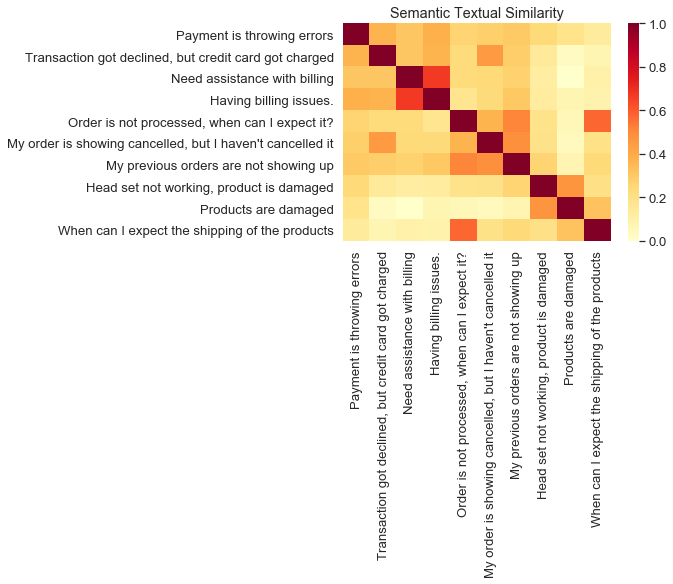

In [96]:
messages = [
#     # Smartphones
#     "I like my phone",
#     "My phone is not good.",
#     "Your cellphone looks great.",

#     # Weather
#     "Will it snow tomorrow?",
#     "Recently a lot of hurricanes have hit the US",
#     "Global warming is real",

#     # Food and health
#     "An apple a day, keeps the doctors away",
#     "Eating strawberries is healthy",
#     "Is paleo better than keto?",

#     # Asking about age
#     "How old are you?",
#     "what is your age?",
    
    # Example: Trouble in the payemnt section
    
#     #Billing
    
#     "Payment is throwing errors",
#     "Transaction got declined, but credit card got charged",
#     "Need assistance with billing",
#     "Having billing issues.",
#     "What is the Commission fee and how much commission is charged?",
#     "Please give an example to show the cost calculation.",
#     "How does the COD (Cash on Delivery) payment option work?",
#     "Why can't I see the COD option on my payment page?",
#     "What is COD limit?",
#     "I want to know about EMI (credit card) payment option?",
#     "How do I make payment using EMI (Credit Card) option?",
#     "What is the eligibility criteria to avail EMI option?",
#     "Why is sum total of EMI’s more than the order value?",
#     "What happens if bank rejects EMI conversion?",
#     "Why is the transaction amount not converted into EMI in 7 working days?",
#     "What should I do if my payment fails?",
#     "What are the modes of payment for purchasing?",
#     "What is COD (Cash On Delivery)? Are there any additional charges for COD orders?",
#     "Are there any hidden costs (sales tax, octroi etc.) on items?",
#     "My transaction failed but the money was deducted from my account. What should I do?",
    
#     #Returns/Refund
#     "I have created a Return request. When will I get the refund?",
#     "What is Instant Refunds?",
#     "I paid cash on delivery, how would I get the refund?",
#     "How long would it take me to receive the refund of the returned product?",
#     "Can I still make returns?",
#     "How do I create a Return Request?",
#     "I have created a Return request. When will the product be picked up?",
#     "How do I return multiple products from a single order?",
#     "Why has my return request been declined?",
#     "If I receive a wrong product, can I get it replaced?",

    
#     #Orders
     
#     "Order is not processed, when can I expect it?",
#     "My order is showing cancelled, but I haven't cancelled it",
#     "My previous orders are not showing up",
#     "How do I manage my orders?",
#     "Why are some, Prime and Non-prime, items taking longer to ship?",
#     "How do I cancel the order, I have placed?",
#     "How do I check the status of my order?",
#     "How do I cancel my Order?",
    
    
#     #Product
    
#     "Head set not working, product is damaged",
#     "Products are damaged",
#     "Do you sell advertising on your site?",
#     "Do you screen the reviews from publishers/labels/studios, customers, authors/artists/actors, or other sources used on your site?",
#     "How do I fix typographical errors on my product detail pages?",
#     "Why are some titles discounted while others are not?",
#     "Who decides the price of the products?",
#     "Would I get compensation if the customer has replaced the original product with a different item?",
#     "Why are there different prices for the same product? Is it legal?",
#     "How will I detect fraudulent emails/calls seeking sensitive personal and confidential information?",
    
    
#     #Shipping
#     "When can I expect the shipping of the products",
#     "Would I get compensation if the goods are damaged or lost in transit?",
#     "Who takes care of the delivery of my products?",
#     "Is it safe to receive orders during a pandemic?",
#     "Is it possible to reduce contact with drivers when they deliver my orders?",
#     "Can healthcare or business customers buy supplies to help its workplace?",
#     "Who takes care of the delivery of my products?",
#     "Where should I self-ship the Returns?",
#     "How can I get my order delivered faster?",
#     "Can I modify the shipping address of my order after it has been placed?",
#     "Why did the pick up of my product fail?",
#     "Why is my returned product re-shipped?",
#     "Can I modify my delivery address?",
#     "Can I open and check the contents of my package before accepting delivery?",
#     "Would I get compensation if the goods are damaged or lost in transit?",
#     "What's the status of my order and delivery? Can I change the address on my order?",
    
#     #Coupons/GiftCards
    
#     "How can I purchase Gift Card?",
#     "I just received a Gift Card. How do I use it?",
#     "How do I check the available balance or expiry date on my Gift Card?",
#     "What should I do if, I have not received the e-mail that had Gift Card details?",
#     "Does Gift Cards expire?",
#     "When is the issued Gift Card sent to the recipient?",
#     "What can my Gift Card not be used for or to purchase?",
#     "How do I cancel a Gift Card?",
#     "What exactly does the recipient receive when I send a issued Gift Card?",
#     "What can I do to ensure that the Gift Card is delivered to the recipient?",
#     "What happens if I need to return something I purchased with my Gift Card?",
#     "Who is the issuer of Gift Cards?",
#     "How many Gift Cards can be used in one transaction?",
#     "How do I apply a coupon on my order?",
#     "Why will 'My Cashback' not be available?",
#     "How can I access 'My Cashback' balance?",
#     "As 'My cashback' is no more a payment option, what will happen to 'My Cashback' balance?",
#     "I was given a coupon when you cancelled my last order. How can I use it?",
#     "What is discount capping on coupons?",
#     "Is there a limit on how many e-Gift Vouchers that can be used per order?",


    #Billing
    
    "Payment is throwing errors",
    "Transaction got declined, but credit card got charged",
    "Need assistance with billing",
    "Having billing issues.",
    
    #Orders
     
    "Order is not processed, when can I expect it?",
    "My order is showing cancelled, but I haven't cancelled it",
    "My previous orders are not showing up",
    
    #Product
    
    "Head set not working, product is damaged",
    "Products are damaged",
    
    #Shipping
    "When can I expect the shipping of the products",
    
]

run_and_plot(messages)

In [39]:
import pandas
import scipy
import math
import csv

sts_dataset = tf.keras.utils.get_file(
    fname="Stsbenchmark.tar.gz",
    origin="http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz",
    extract=True)
sts_dev = pandas.read_table(
    os.path.join(os.path.dirname(sts_dataset), "stsbenchmark", "sts-dev.csv"),
    error_bad_lines=False,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["sim", "sent_1", "sent_2"])
sts_test = pandas.read_table(
    os.path.join(
        os.path.dirname(sts_dataset), "stsbenchmark", "sts-test.csv"),
    error_bad_lines=False,
    quoting=csv.QUOTE_NONE,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["sim", "sent_1", "sent_2"])
# cleanup some NaN values in sts_dev
sts_dev = sts_dev[[isinstance(s, str) for s in sts_dev['sent_2']]]

417792/409630 [==============================] - 2s 6us/step


/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  from ipykernel import kernelapp as app
/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


In [106]:
from itertools import repeat

import pandas
import scipy
import math

#input = "When will my product arrive"

input = "Duplicate credit card charge"

billing_sent = ["Payment is throwing errors",
    "Transaction got declined, but credit card got charged",
    "Need assistance with billing",
    "Having billing issues.",
    "What is the Commission fee and how much commission is charged?",
    "Please give an example to show the cost calculation.",
    "How does the COD (Cash on Delivery) payment option work?",
    "Why can't I see the COD option on my payment page?",
    "What is COD limit?",
    "I want to know about EMI (credit card) payment option?",
    "How do I make payment using EMI (Credit Card) option?",
    "What is the eligibility criteria to avail EMI option?",
    "Why is sum total of EMI’s more than the order value?",
    "What happens if bank rejects EMI conversion?",
    "Why is the transaction amount not converted into EMI in 7 working days?",
    "What should I do if my payment fails?",
    "What are the modes of payment for purchasing?",
    "Having issues with the payement mode",
    "What is COD (Cash On Delivery)? Are there any additional charges for COD orders?",
    "Are there any hidden costs (sales tax, octroi etc.) on items?",
    "My transaction failed but the money was deducted from my account. What should I do?",
                "Questions regarding my charges",
                "Charge related issues",
               "Duplicate charge back"]

orders_sent = ["Order is not processed, when can I expect it?",
    "My order is showing cancelled, but I haven't cancelled it",
    "My previous orders are not showing up",
    "How do I manage my orders?",
    "Why are some, Prime and Non-prime, items taking longer to ship?",
    "How do I cancel the order, I have placed?",
    "How do I check the status of my order?",
    "How do I cancel my Order?"]

product_sent = [ "Head set not working, product is damaged",
    "Products are damaged",
    "Do you sell advertising on your site?",
    "Do you screen the reviews from publishers/labels/studios, customers, authors/artists/actors, or other sources used on your site?",
    "How do I fix typographical errors on my product detail pages?",
    "Why are some titles discounted while others are not?",
    "Who decides the price of the products?",
    "Would I get compensation if the customer has replaced the original product with a different item?",
    "Why are there different prices for the same product? Is it legal?",
    "How will I detect fraudulent emails/calls seeking sensitive personal and confidential information?",]

shipping_sent = ["When can I expect the shipping of the products",
    "Would I get compensation if the goods are damaged or lost in transit?",
    "Who takes care of the delivery of my products?",
    "Is it safe to receive orders during a pandemic?",
    "Is it possible to reduce contact with drivers when they deliver my orders?",
    "Can healthcare or business customers buy supplies to help its workplace?",
    "Who takes care of the delivery of my products?",
    "Where should I self-ship the Returns?",
    "How can I get my order delivered faster?",
    "Can I modify the shipping address of my order after it has been placed?",
    "Why did the pick up of my product fail?",
    "Why is my returned product re-shipped?",
    "Can I modify my delivery address?",
    "Can I open and check the contents of my package before accepting delivery?",
    "Would I get compensation if the goods are damaged or lost in transit?",
    "What's the status of my order and delivery? Can I change the address on my order?",
                "When can I expect the arrival of the product"]

returns_refund_sent = [   "I have created a Return request. When will I get the refund?",
    "What is Instant Refunds?",
    "I paid cash on delivery, how would I get the refund?",
    "How long would it take me to receive the refund of the returned product?",
    "Can I still make returns?",
    "How do I create a Return Request?",
    "I have created a Return request. When will the product be picked up?",
    "How do I return multiple products from a single order?",
    "Why has my return request been declined?",
    "If I receive a wrong product, can I get it replaced?"]

coupons_gift_cards_sent = [  "How can I purchase Gift Card?",
    "I just received a Gift Card. How do I use it?",
    "How do I check the available balance or expiry date on my Gift Card?",
    "What should I do if, I have not received the e-mail that had Gift Card details?",
    "Does Gift Cards expire?",
    "When is the issued Gift Card sent to the recipient?",
    "What can my Gift Card not be used for or to purchase?",
    "How do I cancel a Gift Card?",
    "What exactly does the recipient receive when I send a issued Gift Card?",
    "What can I do to ensure that the Gift Card is delivered to the recipient?",
    "What happens if I need to return something I purchased with my Gift Card?",
    "Who is the issuer of Gift Cards?",
    "How many Gift Cards can be used in one transaction?",
    "How do I apply a coupon on my order?",
    "Why will 'My Cashback' not be available?",
    "How can I access 'My Cashback' balance?",
    "As 'My cashback' is no more a payment option, what will happen to 'My Cashback' balance?",
    "I was given a coupon when you cancelled my last order. How can I use it?",
    "What is discount capping on coupons?",
    "Is there a limit on how many e-Gift Vouchers that can be used per order?"]

category_map = {
    "Billing" : billing_sent,
    "Orders" : orders_sent,
    "Product" : product_sent,
    "Shipping" : shipping_sent,
    "Returns/Refund" : returns_refund_sent,
    "Coupons/GiftCards" : coupons_gift_cards_sent
}

category_scores = {}


def get_comparision(sent_1, sent_2):
    sentence_1 = []
    sentence_1.extend(repeat(sent_1,len(sent_2)))
    sts_encode1 = tf.nn.l2_normalize(embed(tf.constant(sentence_1)), axis=1)
    sts_encode2 = tf.nn.l2_normalize(embed(tf.constant(sent_2)), axis=1)
    cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
    clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
    scores = 1.0 - tf.acos(clip_cosine_similarities) / math.pi
    return scores

def helper(sentence, list_of_sent, category):
    if category in category_scores:
        list_scores = category_scores.get(category)
        list_scores.append(get_comparision(input, list_of_sent))
        category_scores[category] = list_scores
    else:
        category_scores[category] = []
        list_scores = category_scores.get(category)
        list_scores.append(get_comparision(input, list_of_sent))
        category_scores[category] = list_scores
for i in category_map:
    helper(input, category_map.get(i), i)
    
print(category_scores)

category_match = {}

max_similarity =0
category_result = "Other"
threshold = 0.3
for i in category_scores:
    for score_list in category_scores.get(i):
        category_match[i] = np.mean(score_list)
        if max_similarity < category_match[i] and  category_match[i] > threshold:
            max_similarity = category_match[i]
            category_result= i 
        elif max_similarity == category_match[i] and i < category_result:
            category_result= i

print(category_result)

{'Billing': [<tf.Tensor: shape=(24,), dtype=float32, numpy=
array([0.6077008 , 0.6786652 , 0.6021886 , 0.62864006, 0.55409807,
       0.5473399 , 0.54535455, 0.550699  , 0.5321224 , 0.63838077,
       0.6198271 , 0.48918253, 0.54537857, 0.542173  , 0.55015385,
       0.57426137, 0.5416583 , 0.58218855, 0.54799306, 0.57941276,
       0.5696203 , 0.6198089 , 0.635895  , 0.7355325 ], dtype=float32)>], 'Orders': [<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.54315686, 0.5584407 , 0.55527896, 0.54390246, 0.5253812 ,
       0.57071424, 0.5329622 , 0.56352895], dtype=float32)>], 'Product': [<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.5319699 , 0.49989283, 0.5333575 , 0.51462436, 0.55211693,
       0.53688896, 0.5280061 , 0.53328985, 0.55267704, 0.5361881 ],
      dtype=float32)>], 'Shipping': [<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([0.50996494, 0.50032663, 0.5046401 , 0.5052712 , 0.53460526,
       0.5045134 , 0.5046401 , 0.52763927, 0.54772735, 0.54391706,


In [76]:
sts_data = sts_dev 

def run_sts_benchmark(batch):
    sts_encode1 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_1'].tolist())), axis=1)
    sts_encode2 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_2'].tolist())), axis=1)
    cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
    clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
    scores = 1.0 - tf.acos(clip_cosine_similarities) / math.pi
    """Returns the similarity scores"""
    return scores

dev_scores = sts_data['sim'].tolist()
scores = []
for batch in np.array_split(sts_data, 10):
    #print(batch)
    scores.extend(run_sts_benchmark(batch))

pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
    pearson_correlation[0], pearson_correlation[1]))

Pearson correlation coefficient = 0.8036396837702949
p-value = 0.0
